In [3]:
# Import Pandas
import pandas as pd

# Import Numpy
import numpy as np

# Import SciPy
from scipy import stats
from scipy.special import comb
import math

# Import StatsModels
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Import SkLearn
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import preprocessing as pp
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Import Visuals
import matplotlib.pyplot as plt 
from matplotlib.dates import DateFormatter
%matplotlib inline
import seaborn as sns

# Import DateTime
import datetime

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:

# Make a path to dataset
path = 'C:/Users/swana/Downloads/mushrooms.csv'

# Retrieve dataset
df = pd.read_csv(path)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
# Get unique and top values for the dataset
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [17]:
# The class column contains the labels
X = df.drop(['class'], axis=1)
y = df['class']

In [18]:
# Write a loop that prints attibutes of each column
for attr in X.columns:
    print('\n', attr)
    print(X[attr].value_counts())


 cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

 cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

 cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

 bruises
f    4748
t    3376
Name: bruises, dtype: int64

 odor
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

 gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64

 gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64

 gill-size
b    5612
n    2512
Name: gill-size, dtype: int64

 gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

 stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64

 stalk-root
b    3776
?    2480
e    1120
c     556
r  

In [19]:
# Drop Veil-Type feature
df.drop(['veil-type'], axis=1, inplace=True)

In [20]:
# Drop Veil-Color feature
df.drop(['veil-color'], axis=1, inplace=True)

In [21]:
# Drop Ring-Number feature
df.drop(['ring-number'], axis=1, inplace=True)

In [22]:
# Drop Stalk-Shape feature
df.drop(['stalk-shape'], axis=1, inplace=True)

In [23]:
# Get null values
for col in df.columns:
    print("{} : {}".format(col, df[col].isnull().sum()))

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


Text(0.5, 1.0, 'Poison or Edible Classification')

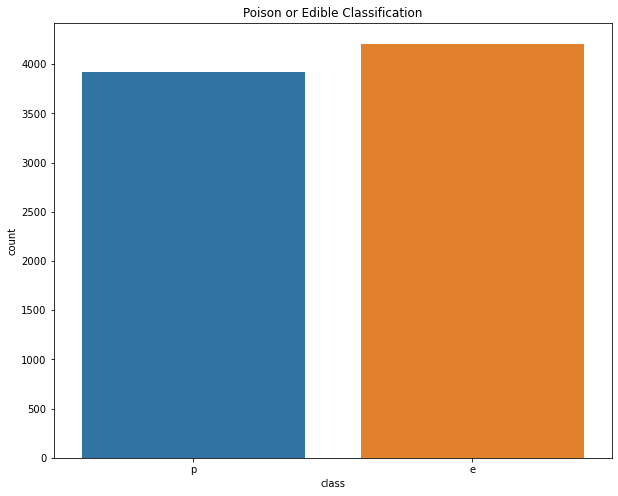

In [24]:
# Plot the initial class for the dataset
x = df['class']
plt.figure(figsize=(10,8))
ax = sns.countplot(x=x, data=df)
plt.title('Poison or Edible Classification')

In [25]:
# Print the count in each class
print(df.groupby('class').size())

class
e    4208
p    3916
dtype: int64


In [29]:
# Write a function to plot classes vs. features
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        plt.figure(figsize=(10,8))
        ax = sns.countplot(x=df[col], hue=hue, data=df)

<Figure size 432x288 with 0 Axes>

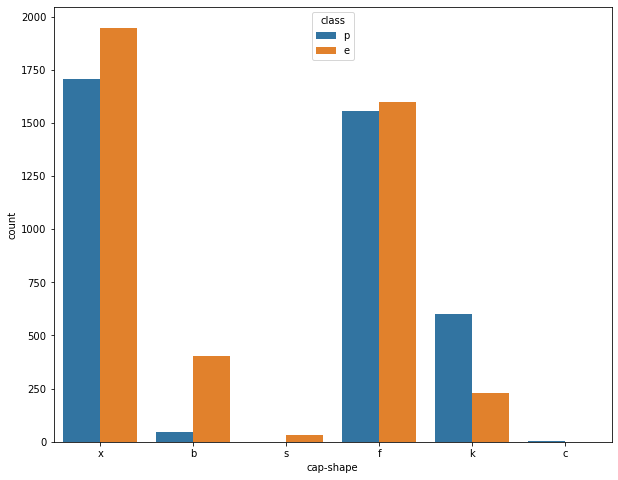

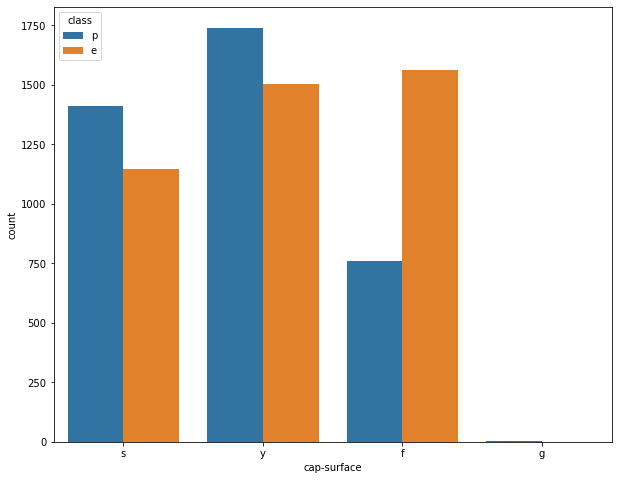

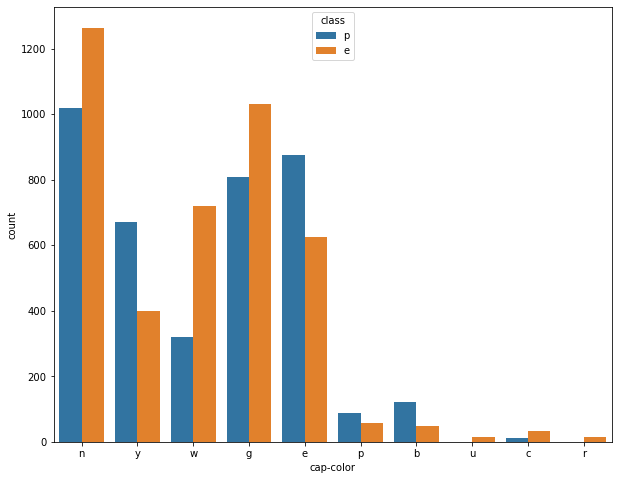

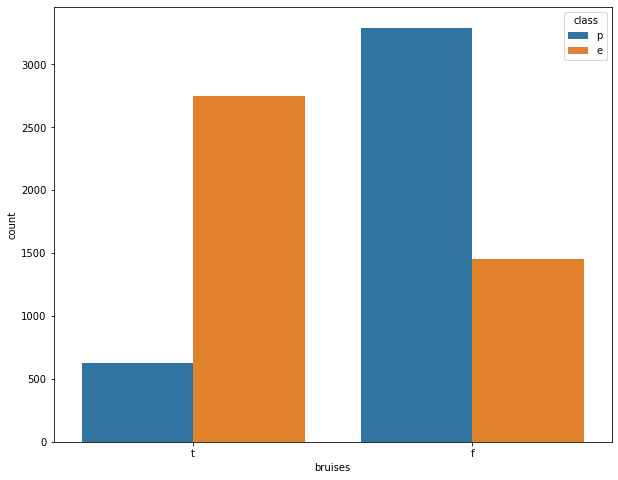

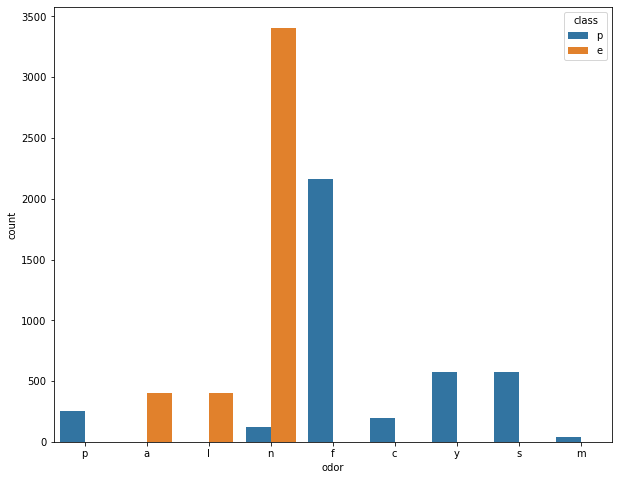

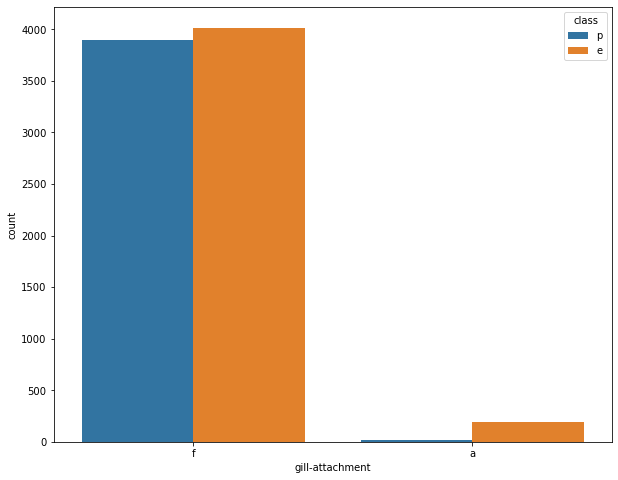

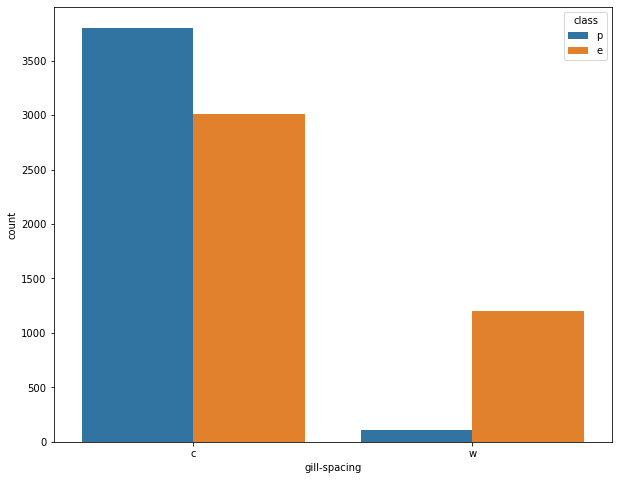

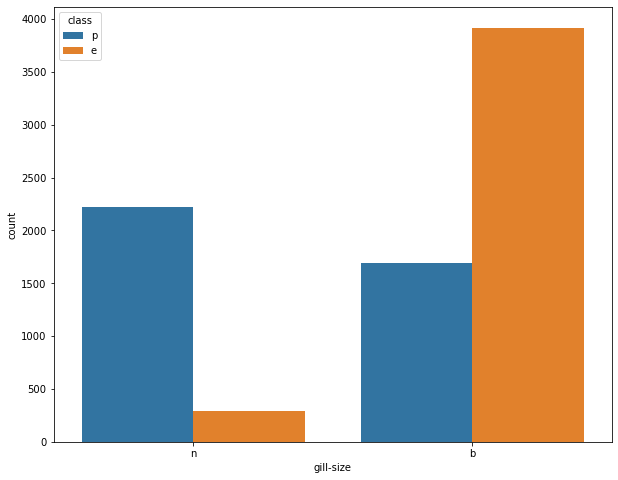

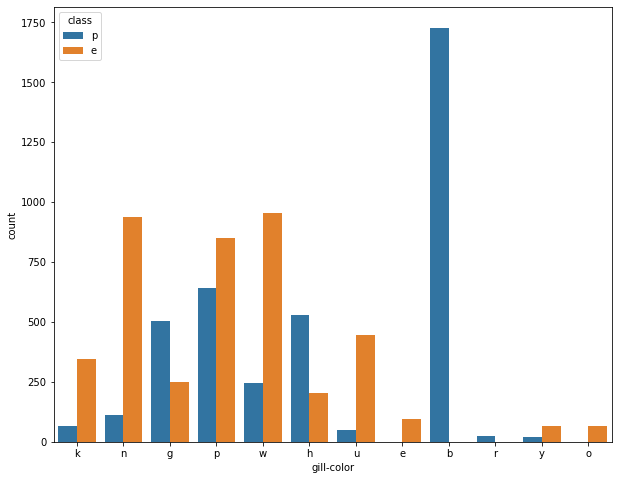

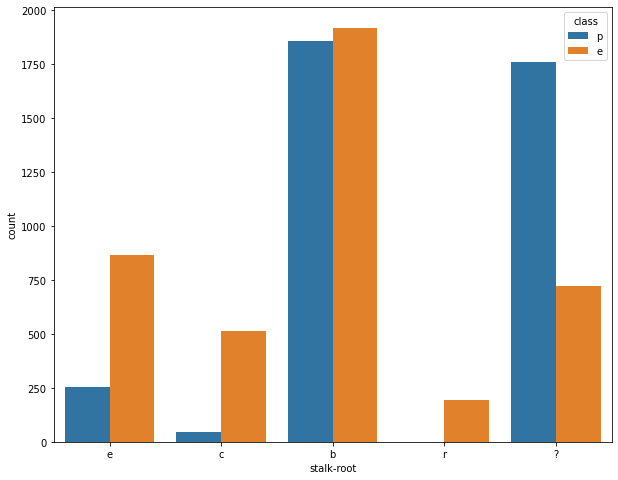

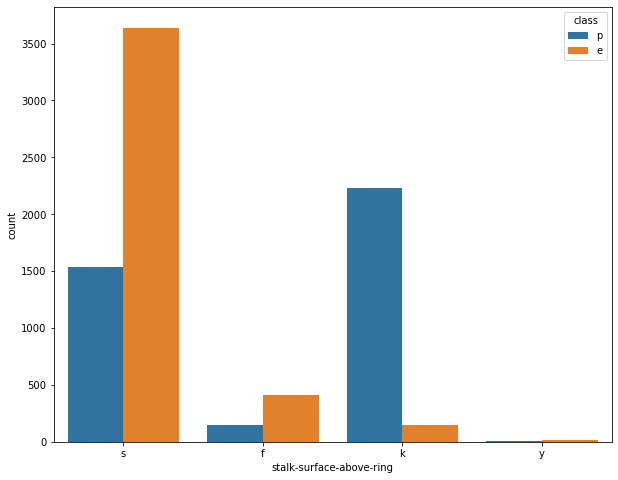

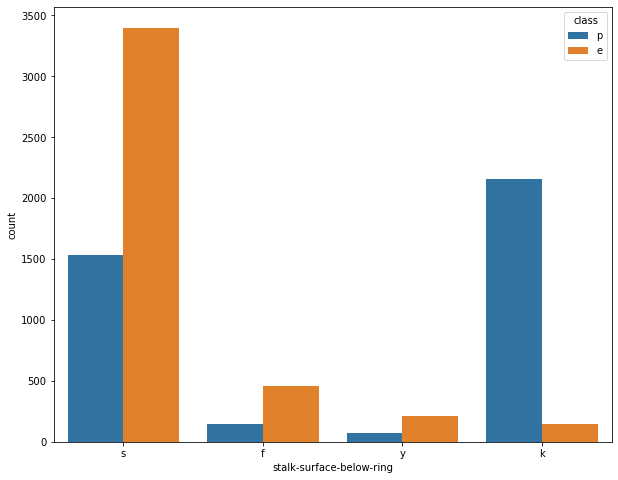

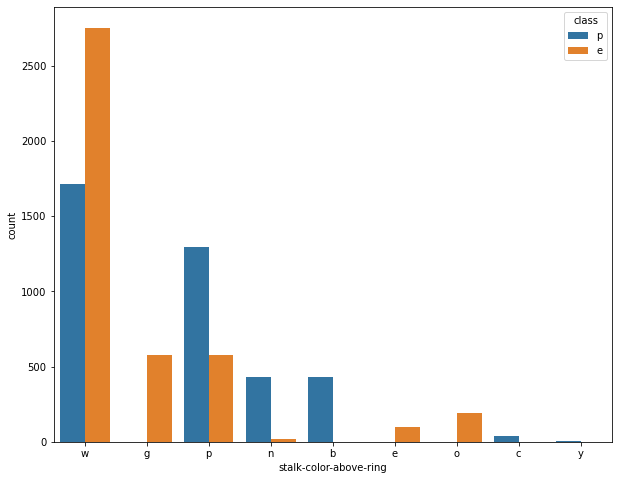

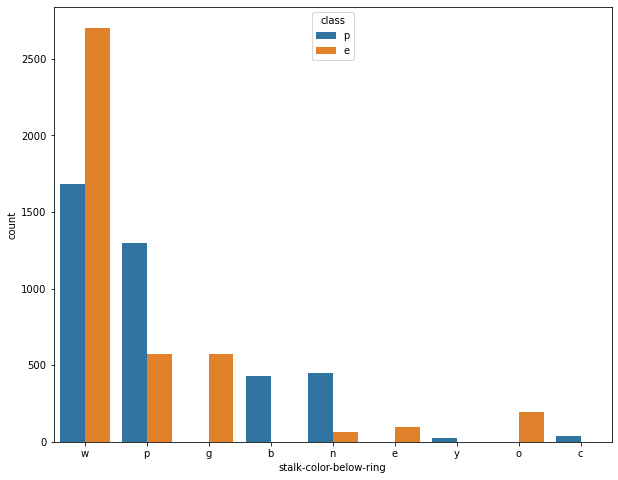

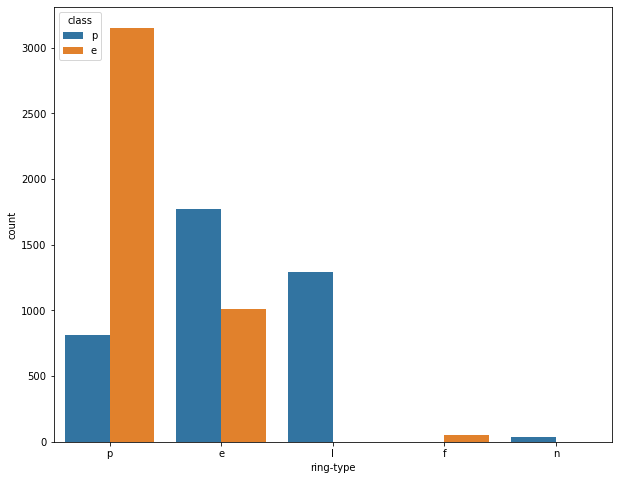

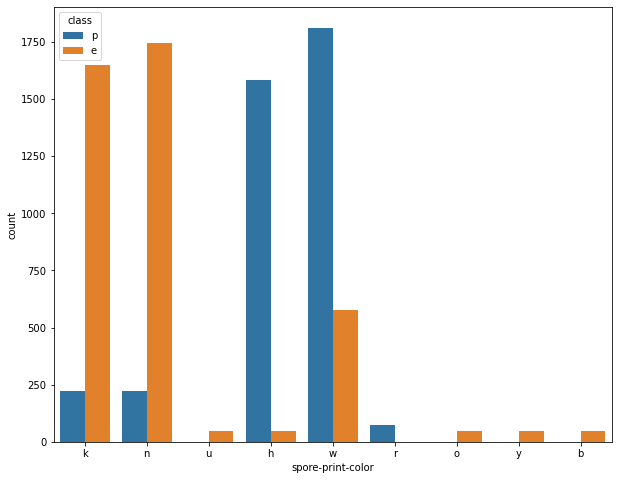

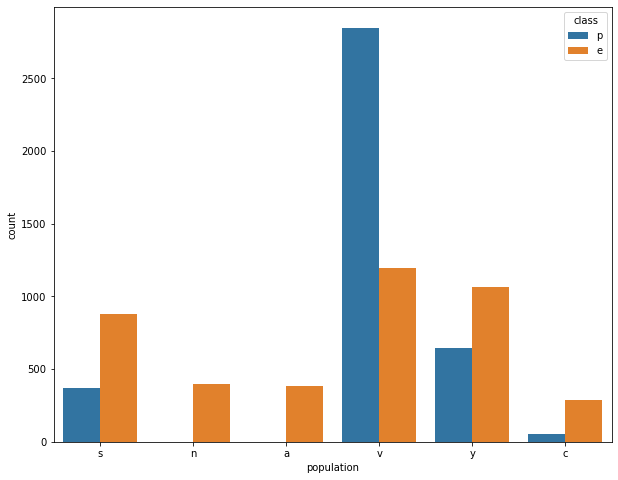

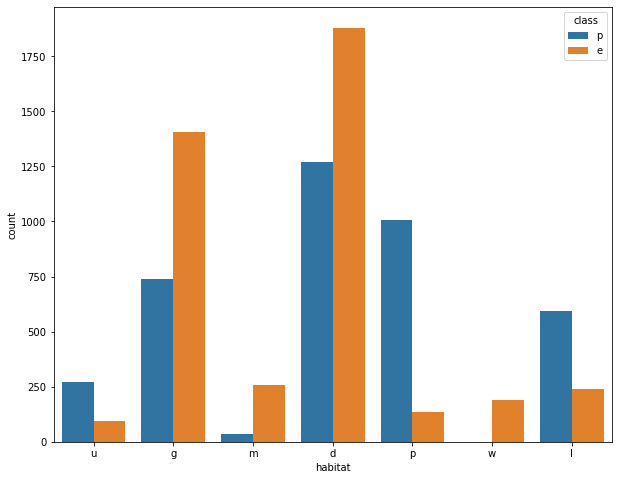

In [30]:
# Plot the features in which hue is idenitfied as 'class'
hue = df['class']
dataplot = df.drop('class', 1)
plot_data(hue, dataplot)

Text(0.5, 1.0, 'Mushroom Odor Count')

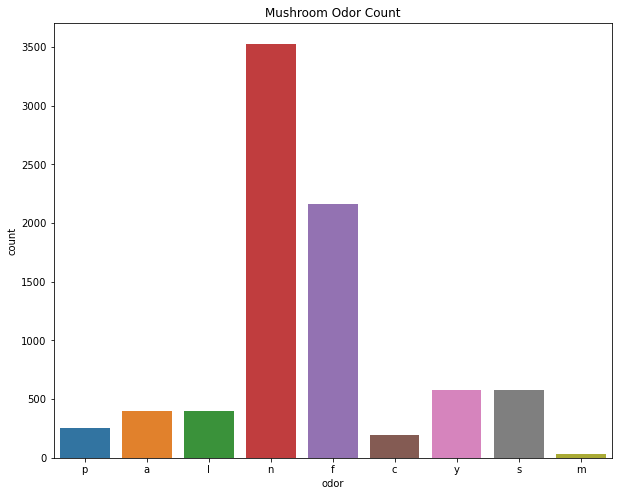

In [31]:
# Plot the count for odor 
x = df['odor']
plt.figure(figsize=(10,8))
ax = sns.countplot(x=x, data=df)
plt.title('Mushroom Odor Count')

Text(0.5, 1.0, 'Mushroom Gill-Color Count')

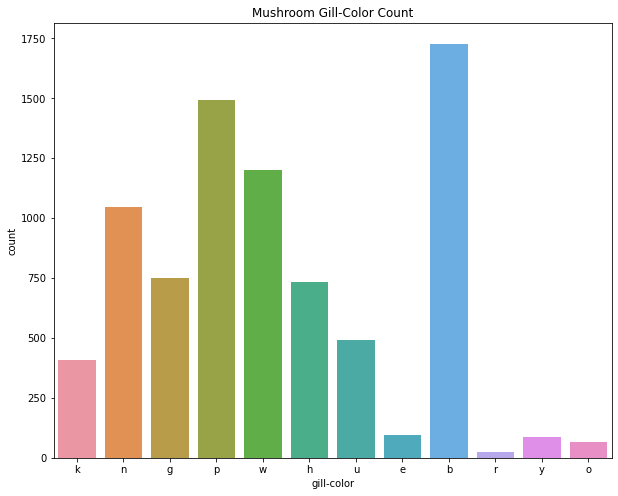

In [32]:
# Plot the count for Gill-Color
x = df['gill-color']
plt.figure(figsize=(10,8))
ax = sns.countplot(x=x, data=df)
plt.title('Mushroom Gill-Color Count')

Text(0.5, 1.0, 'Mushroom Spore-Print-Color Count')

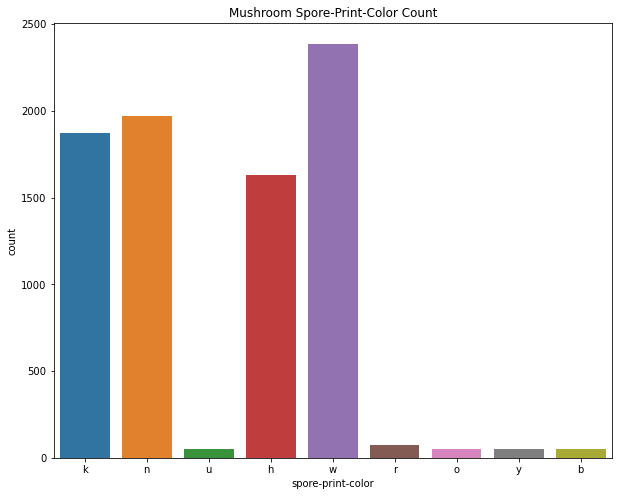

In [33]:
# Plot the count for Spore Print Color
x = df['spore-print-color']
plt.figure(figsize=(10,8))
ax = sns.countplot(x=x, data=df)
plt.title('Mushroom Spore-Print-Color Count')

In [34]:
# Write a loop that creates binary class for columns with value counts==2
# Quick Label encoding
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,3,2,2,7,7,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,2,2,2,7,7,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,2,2,2,7,7,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,3,2,2,7,7,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,3,2,2,7,7,0,3,0,1


In [35]:
# Find unique values for a 'random' column
df['ring-type'].unique()

array([4, 0, 2, 1, 3])

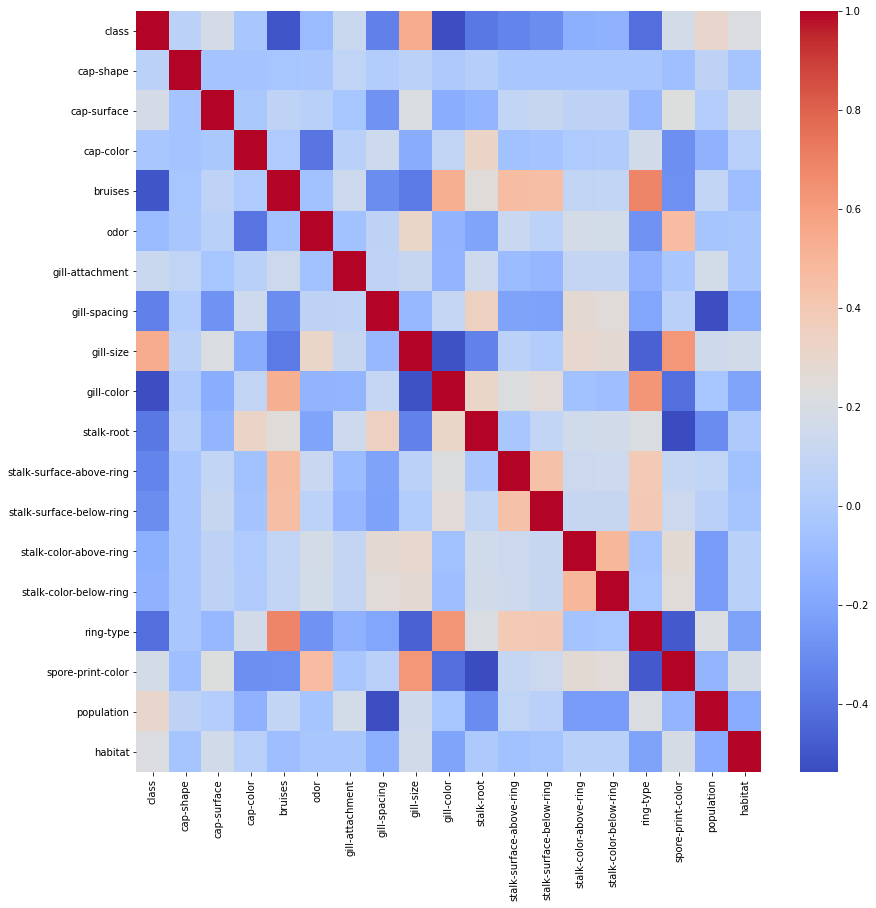

In [36]:
# Set correlation variable
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm')

In [37]:
# Separate labels into X and y
X = df.iloc[:,1:18]  # all rows, all the features and no labels
y = df.iloc[:, 0]  # all rows, label only

In [38]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population
0,5,2,4,1,6,1,0,1,4,3,2,2,7,7,4,2,3
1,5,2,9,1,0,1,0,0,4,2,2,2,7,7,4,3,2
2,0,2,8,1,3,1,0,0,5,2,2,2,7,7,4,3,2
3,5,3,8,1,6,1,0,1,5,3,2,2,7,7,4,2,3
4,5,2,3,0,5,1,1,0,4,3,2,2,7,7,0,3,0


In [39]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,1.109798,1.575086,1.603644,5.816347,5.794682,2.291974,3.596750,3.644018
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,1.061106,0.621459,0.675974,1.901747,1.907291,1.801672,2.382663,1.252082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.000000,2.000000,3.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,2.000000,2.000000,7.000000,7.000000,2.000000,3.000000,4.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,2.000000,2.000000,7.000000,7.000000,4.000000,7.000000,4.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,4.000000,3.000000,3.000000,8.000000,8.000000,4.000000,8.000000,5.000000


In [40]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [41]:
# Convert data to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.02971224,  0.14012794, -0.19824983, ...,  0.94808086,
        -0.67019486, -0.5143892 ],
       [ 1.02971224,  0.14012794,  1.76587407, ...,  0.94808086,
        -0.2504706 , -1.31310821],
       [-2.08704716,  0.14012794,  1.37304929, ...,  0.94808086,
        -0.2504706 , -1.31310821],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ...,  0.94808086,
        -1.50964337, -2.11182722],
       [-0.21699152,  0.95327039, -0.19824983, ..., -1.27221574,
         1.42842641,  0.28432981],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.94808086,
         0.16925365, -2.11182722]])

In [42]:
# Split the data into trains and tests
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=19)
print(y_train.value_counts(),'\n', y_test.value_counts())

0    2945
1    2741
Name: class, dtype: int64 
 0    1263
1    1175
Name: class, dtype: int64


In [43]:
# Fit a default LogReg model
lr_normal = LogisticRegression()
lr_normal.fit(X_train,y_train)

LogisticRegression()

In [44]:
# Retrieve the accuracy score of the LR model
y_prob = lr_normal.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
print('The accuracy of LR Normal is', lr_normal.score(X_test, y_pred)*100)

The accuracy of LR Normal is 100.0


In [45]:
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[1204   59]
 [  84 1091]]


In [46]:
# Retrieve the AUC score
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9408982328464818

In [47]:
# Retrieve the ROC score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9755091726891393

Text(0.5, 0, 'False Positive Rate')

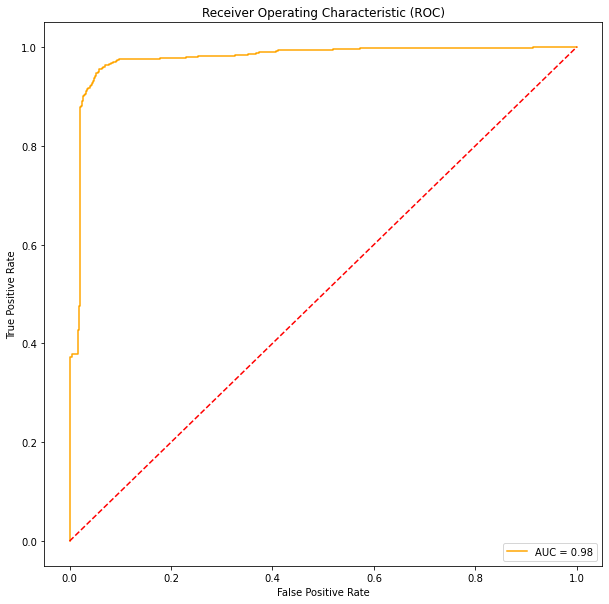

In [48]:
# Plot the ROC Curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate,true_positive_rate, color='orange',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', c='red')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [49]:
# Use tuned parameters in logreg model
lr_tuned = LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

In [50]:
# Use Grid Search for logreg
lr_tuned = GridSearchCV(lr_tuned, tuned_parameters, cv=10)

In [51]:
# Fit a default LogReg model
lr_tuned.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [52]:
# Print the best parameters
print(lr_tuned.best_params_)

{'C': 100, 'penalty': 'l2'}


In [53]:
# Get the accuracy of the model
y_prob = lr_tuned.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
print('The accuracy of the LR Model is', lr_tuned.score(X_test, y_pred)*100)

The accuracy of the LR Model is 100.0


In [54]:
# Identify the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[1207   56]
 [  87 1088]]


In [55]:
# Print the precision and recall scores
auc_roc = metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1263
           1       0.95      0.93      0.94      1175

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



In [56]:
# Print the roc/auc true and false positive rates
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.977129765334142

Text(0.5, 0, 'False Positive Rate')

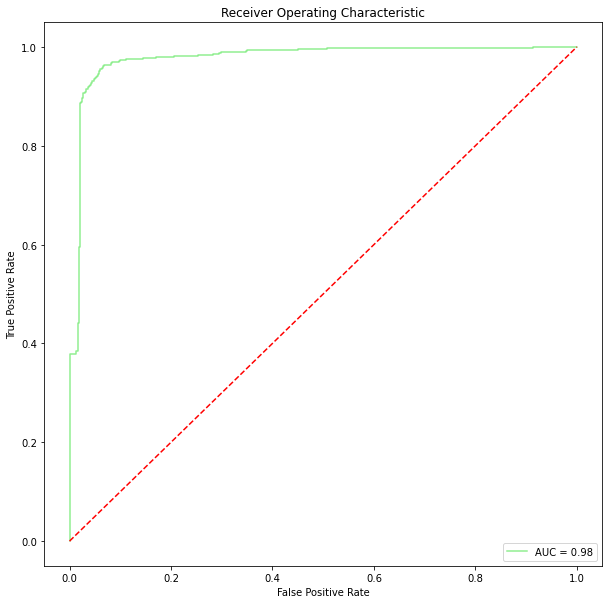

In [57]:
# Plot the ROC curve including the false/true positive rates
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='lightgreen',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='red')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [59]:
# Fit a lasso LogReg model
lr_lasso = LogisticRegression(C=100, penalty='l2')
lr_lasso.fit(X_train,y_train.values.ravel())

LogisticRegression(C=100)

In [60]:
# Get the accuracy of the model
y_prob = lr_lasso.predict_proba(X_test)[:,1] # This will give positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions
lr_lasso.score(X_test, y_pred)

1.0

In [61]:
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1207,   56],
       [  87, 1088]], dtype=int64)

In [62]:
# Print the precision and recall scores
auc_roc = metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1263
           1       0.95      0.93      0.94      1175

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



In [63]:
# Print the roc/auc true and false positive rates
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.977129765334142


Text(0.5, 0, 'False Positive Rate')

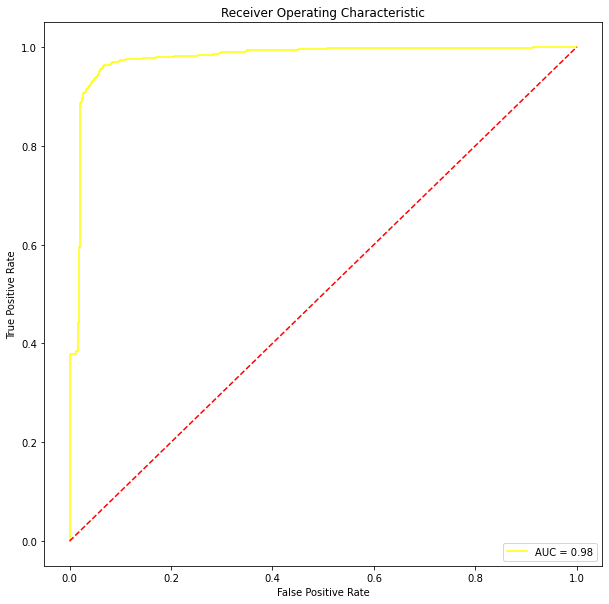

In [64]:
# Plot the ROC Curve
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='yellow',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', c='red')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [65]:
# Identify top performing features
feature_coeff = pd.DataFrame(lr_lasso.coef_, columns = X.columns, index = ['coefficients'])
feature_coeff.sort_values('coefficients', axis=1, ascending=False, inplace=True)
feature_coeff.T.head()

,coefficients
gill-size,4.984176
ring-type,3.198069
gill-attachment,0.745607
cap-surface,0.504358
bruises,0.091022


In [66]:
# Identify bottom performing features
feature_coeff.T.tail()

,coefficients
population,-0.893195
odor,-1.542519
stalk-root,-3.433735
gill-spacing,-4.052947
stalk-surface-above-ring,-4.452933


In [67]:
npsvm_model = SVC()

In [68]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],}

In [69]:
npsvm_model = RandomizedSearchCV(npsvm_model, tuned_parameters, 
                               cv=10, scoring='accuracy', n_iter=20)

In [74]:
npsvm_model.fit(X_train, y_train)
print(npsvm_model.best_score_)

1.0


In [75]:
print(npsvm_model.best_params_)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}


In [76]:
y_pred = npsvm_model.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [77]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1263,    0],
       [   0, 1175]], dtype=int64)

In [78]:
auc_roc = metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [79]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

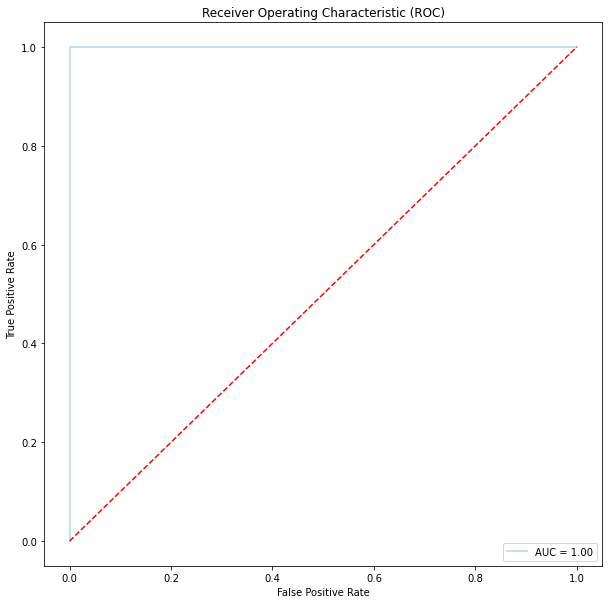

In [80]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate,true_positive_rate, color='lightblue',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', c='red')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [81]:
psvm_model = SVC()

In [82]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']}

In [83]:
psvm_model = RandomizedSearchCV(psvm_model, tuned_parameters, cv=10, scoring='accuracy', n_iter=20)

In [84]:
psvm_model.fit(X_train, y_train)
print(psvm_model.best_score_)

1.0


In [85]:
print(psvm_model.best_params_)

{'kernel': 'poly', 'gamma': 1, 'degree': 4, 'C': 1000}


In [86]:
y_pred = psvm_model.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [87]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1263,    0],
       [   0, 1175]], dtype=int64)

In [88]:
auc_roc = metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [89]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [90]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

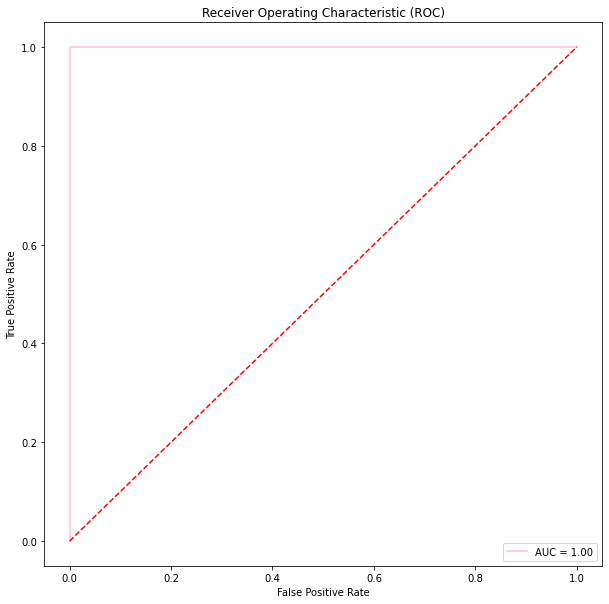

In [91]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate,true_positive_rate, color='pink',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', c='red')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [92]:
tree_model = DecisionTreeClassifier()

In [93]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [94]:
y_prob = tree_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
tree_model.score(X_test, y_pred)

1.0

In [95]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1263,    0],
       [   0, 1175]], dtype=int64)

In [96]:
auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [97]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [98]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

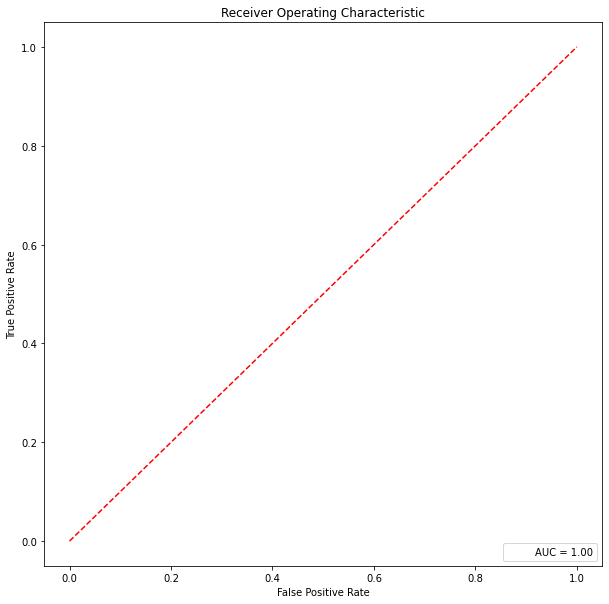

In [99]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='white',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', c='red')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [100]:
ttree_model = DecisionTreeClassifier()


tuned_parameters= {'criterion': ['gini','entropy'], 'max_features': ["auto","sqrt","log2"],
                   'min_samples_leaf': range(1,100,1) , 'max_depth': range(1,50,1)
                  }

In [101]:
ttree_model = RandomizedSearchCV(ttree_model, tuned_parameters, 
                                 cv=10, scoring='accuracy', 
                                 n_iter=20, random_state=5)

In [102]:
ttree_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 50),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 100)},
                   random_state=5, scoring='accuracy')

In [103]:
print(ttree_model.best_score_)

0.9963077675189979


In [104]:
print(ttree_model.best_params_)

{'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 31, 'criterion': 'entropy'}


In [105]:
y_prob = ttree_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
ttree_model.score(X_test, y_pred)

1.0

In [106]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1261,    2],
       [  14, 1161]], dtype=int64)

In [107]:
auc_roc = metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1263
           1       1.00      0.99      0.99      1175

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [108]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.993250787554118

In [109]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9999070096528023

Text(0.5, 0, 'False Positive Rate')

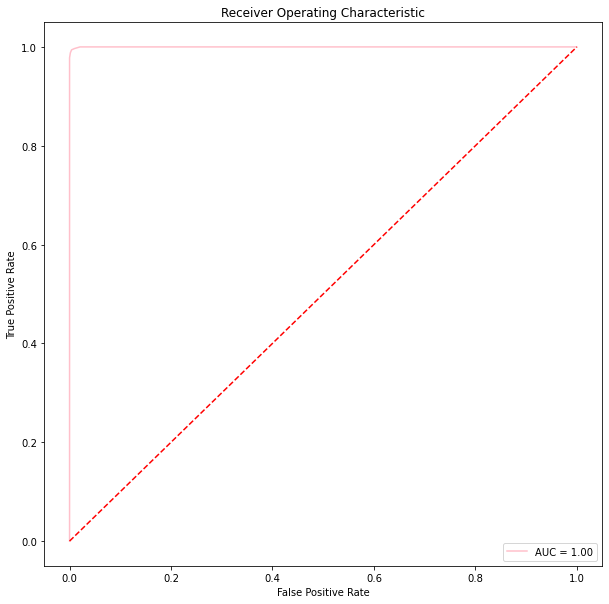

In [110]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='pink',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='red')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [111]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

In [112]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [113]:
y_prob = rfc_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions
rfc_model.score(X_test, y_pred)

1.0

In [114]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1263,    0],
       [   0, 1175]], dtype=int64)

In [115]:
auc_roc = metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [116]:
auc_roc = metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [117]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

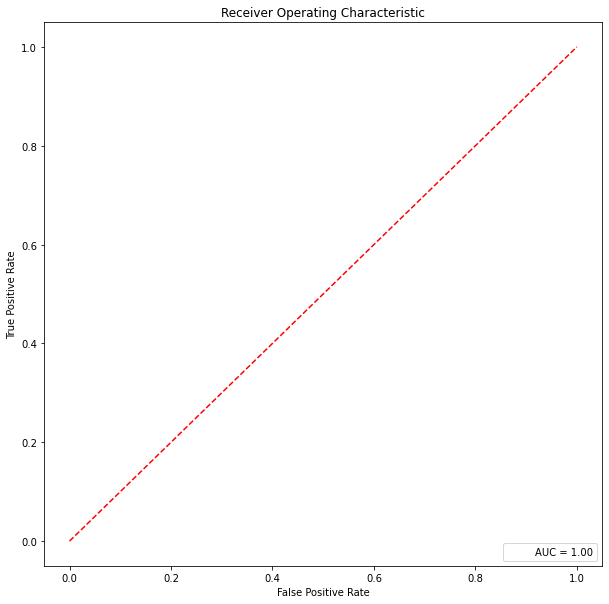

In [118]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='white',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='red')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [119]:
trcf_model=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }

In [120]:
trcf_model = RandomizedSearchCV(trcf_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [121]:
trcf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(10, 100, 10),
                                        'n_estimators': range(10, 100, 10)},
                   scoring='accuracy')

In [122]:
print(trcf_model.best_score_)

0.9991209559642564


In [123]:
print(trcf_model.best_params_)

{'n_estimators': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}


In [124]:
y_prob = trcf_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
trcf_model.score(X_test, y_pred)

1.0

In [125]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1262,    1],
       [   4, 1171]], dtype=int64)

In [126]:
print(auc_roc)

1.0


In [127]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9979019895217399

In [128]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9999885446673742

Text(0.5, 0, 'False Positive Rate')

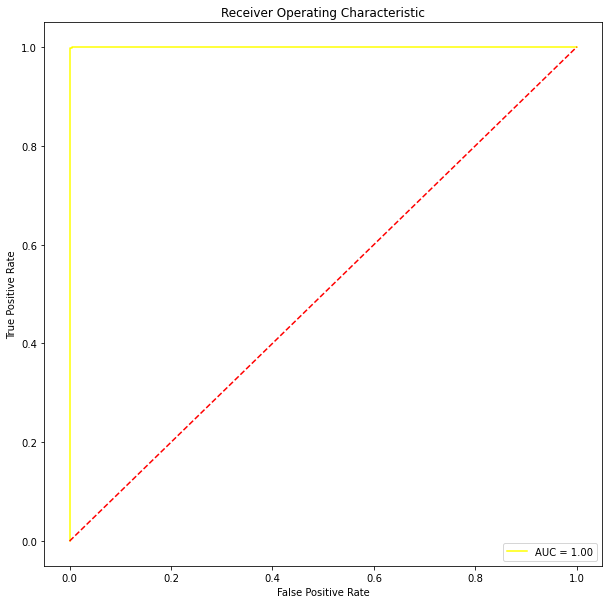

In [129]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='yellow',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='red')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')